fatal: destination path 'EC1B1-Python' already exists and is not an empty directory.
There are 0 outliers in Economic Activity, Industrial Production, Index
There are 0 outliers in Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate
There are 0 outliers in International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar of Spain
There are 0 outliers in Prices, Consumer Price Index, All items, Index of Spain
There are 0 outliers in Log Exchange Rate
There are 9 outliers in Difference In Log Exchange Rate
There are 0 outliers in Monthly Inflation Rate of Spain
There are 0 outliers in Log Industrial Production
There are 20 outliers in Monthly Growth Industrial Production
There are 0 outliers in Growth Industrial Production Vs 12 Months Ago
There are 0 outliers in Index International Reserves of Spain
There are 0 outliers in International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar of US
There are 0 outliers in Prices, Consumer

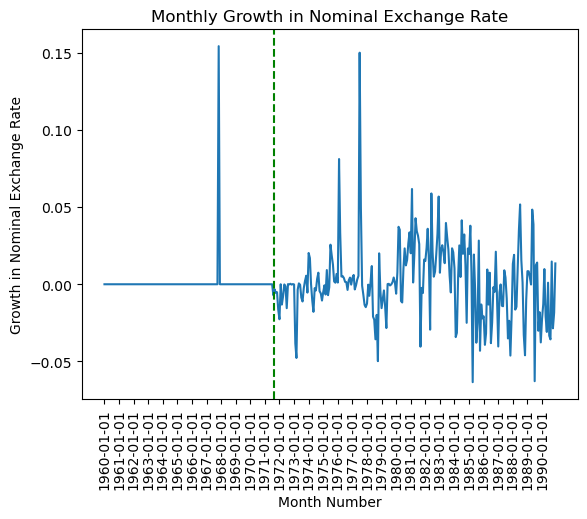

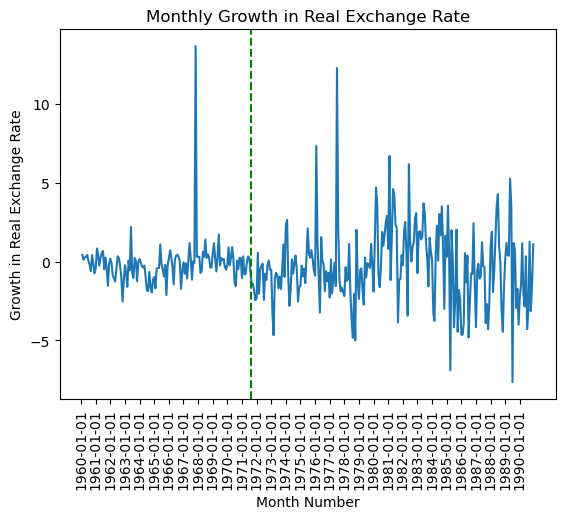

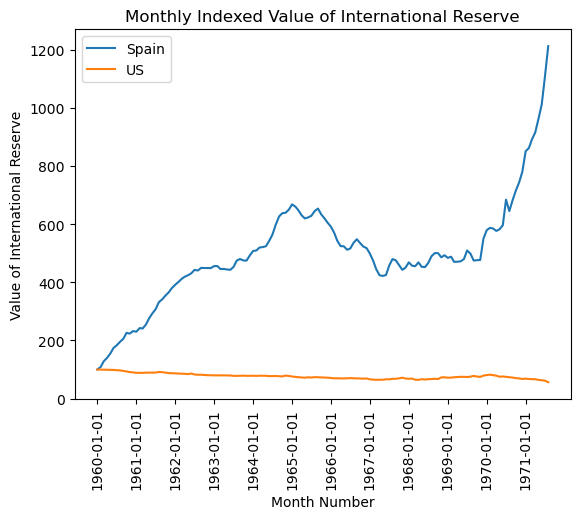

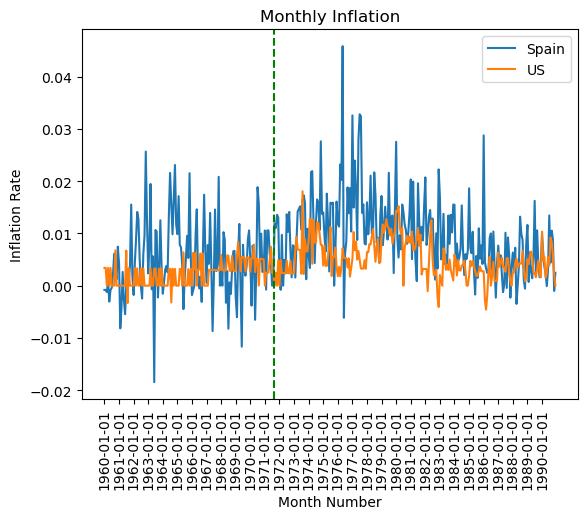

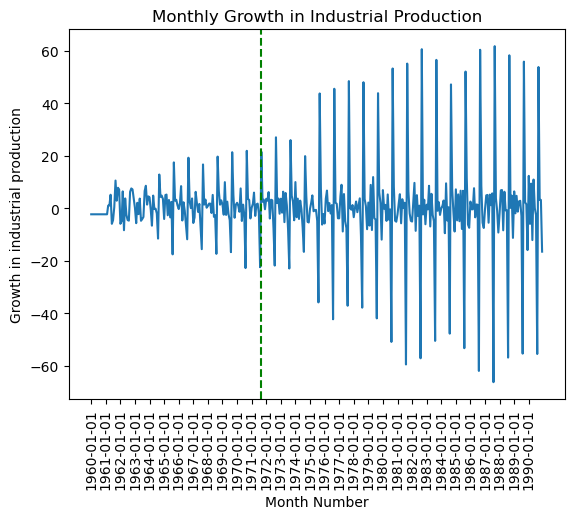

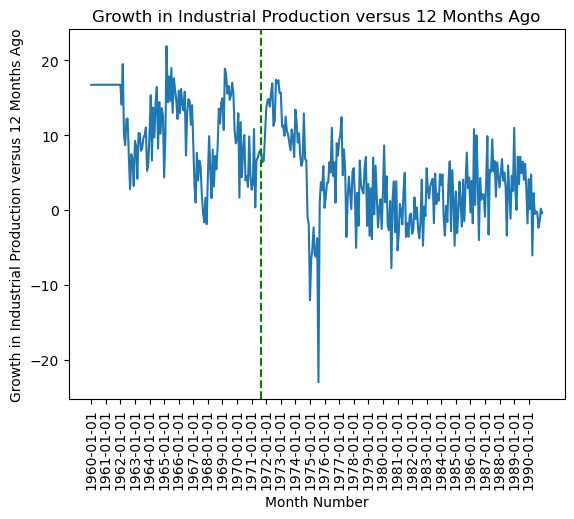

,Month,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar of Spain","Prices, Consumer Price Index, All items, Index of Spain",Log Exchange Rate,Difference In Log Exchange Rate,Monthly Inflation Rate of Spain,Log Industrial Production,Monthly Growth Industrial Production,Growth Industrial Production Vs 12 Months Ago,Index International Reserves of Spain,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar of US","Prices, Consumer Price Index, All items, Index of US",Monthly Inflation Rate of US,Index International Reserves of US,Real Exchange Rate,Log Real Exchange Rate,Monthly Real Exchange Rate Growth,Difference in Inflation Rate Between Spain and US
0,1960-01-01,18.681625,60.000000,233.000000,2.857368,4.094345,0.000000,-0.000811,2.927540,-2.350061,16.724722,100.000000,21478.100000,13.436946,0.003413,100.000000,282.153680,5.642452,NaN,-0.004224
1,1960-02-01,18.681625,60.000000,253.000000,2.855049,4.094345,0.000000,-0.000811,2.927540,-2.350061,16.724722,108.583691,21395.700000,13.482806,0.003413,99.616353,283.346534,5.646671,0.421876,-0.004224
2,1960-03-01,18.681625,60.000000,299.000000,2.851573,4.094345,0.000000,-0.001218,2.927540,-2.350061,16.724722,128.326180,21344.700000,13.482806,0.000000,99.378902,283.691987,5.647889,0.121844,-0.001218
3,1960-04-01,18.681625,60.000000,326.000000,2.853891,4.094345,0.000000,0.000813,2.927540,-2.350061,16.724722,139.914163,21278.000000,13.528666,0.003401,99.068353,284.425709,5.650472,0.258299,-0.002588
4,1960-05-01,18.681625,60.000000,360.000000,2.845198,4.094345,0.000000,-0.003046,2.927540,-2.350061,16.724722,154.506438,21234.300000,13.528666,0.000000,98.864890,285.294743,5.653523,0.305074,-0.003046
5,1960-06-01,18.681625,60.000000,406.000000,2.842878,4.094345,0.000000,-0.000815,2.927540,-2.350061,16.724722,174.248927,21169.800000,13.574526,0.003390,98.564584,286.495380,5.657722,0.419958,-0.004205
6,1960-07-01,18.681625,60.000000,427.000000,2.841719,4.094345,0.000000,-0.000408,2.927540,-2.350061,16.724722,183.261803,20999.400000,13.574526,0.000000,97.771218,286.612290,5.658130,0.040799,-0.000408
7,1960-08-01,18.681625,60.000000,455.000000,2.847516,4.094345,0.000000,0.002040,2.927540,-2.350061,16.724722,195.278970,20803.400000,13.574526,0.000000,96.858661,286.028803,5.656093,-0.203788,0.002040
8,1960-09-01,18.681625,60.000000,479.000000,2.864902,4.094345,0.000000,0.006106,2.927540,-2.350061,16.724722,205.579399,20430.000000,13.574526,0.000000,95.120146,284.292960,5.650005,-0.608726,0.006106
9,1960-10-01,18.681625,60.000000,527.000000,2.872438,4.094345,0.000000,0.002630,2.927540,-2.350061,16.724722,226.180258,20068.200000,13.666246,0.006757,93.435639,285.462974,5.654112,0.410708,-0.004126


In [445]:
spain = 'https://github.com/dxxxrwu/EC1B1-Python/blob/main/Spain_Data.xlsx?raw=true'
us = 'https://github.com/dxxxrwu/EC1B1-Python/blob/main/US_Data.xlsx?raw=true'
#Import the data
import pandas as pd
spain_data = pd.read_excel(spain, header=2)
df1 = pd.DataFrame(spain_data)
df1.columns = ['Month'] + list(df1.columns[1:])
pd.options.display.max_rows = 500
drop_rows_1 = [i for i in range(len(df1)) if i % 13 == 0]
df1 = df1.drop(drop_rows_1)

#Cleaning the data
#(i)The log exchange rate
import numpy as np
df1['Log Exchange Rate'] = np.log(df1['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'])

#(ii)The difference in the log exchange rate versus the previous month
df1['Difference In Log Exchange Rate'] = df1['Log Exchange Rate'].diff()

#(iii)The monthly inflation rate
df1['Monthly Inflation Rate'] = df1['Prices, Consumer Price Index, All items, Index'].pct_change()

#(iv)Log industrial production
df1['Log Industrial Production'] = np.log(df1['Economic Activity, Industrial Production, Index'])

#(v)Monthly growth in industrial production
df1['Monthly Growth Industrial Production'] = df1['Log Industrial Production'].diff() * 100

#(vi)Growth in industrial production versus 12 months ago
df1['Growth Industrial Production Vs 12 Months Ago'] = (df1['Log Industrial Production'] - df1['Log Industrial Production'].shift(12)) * 100

#(vii)An index of the value of international reserves
df1['Index International Reserves'] = df1['International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar'] / 233.0 * 100

#Import the data
import pandas as pd
us_data = pd.read_excel(us, header=2)
df2 = pd.DataFrame(us_data)
df2.columns = ['Month'] + list(df2.columns[1:])
drop_rows_2 = [i for i in range(len(df2)) if i % 13 == 0]
df2 = df2.drop(drop_rows_2)


#(i)The monthly inflation rate
import numpy as np
df2['Monthly Inflation Rate'] = df2['Prices, Consumer Price Index, All items, Index'].pct_change()

#(ii)An index of the value of international reserves
df2['Index International Reserves'] = df2['International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar']/21478.1 * 100

df3 = pd.merge(left = df1, right = df2, how = 'left', on = 'Month', suffixes=(' of Spain', ' of US'))
df3.head()

#drop rows with missing values
df_drop = df3.dropna()

#identify outliers
for col in df_drop.columns[1:]:
    Q1 = df_drop[col].quantile(0.25)
    Q3 = df_drop[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_drop[(df_drop[col] < Q1 - 5 * IQR) | (df_drop[col] > Q3 + 5 * IQR)]
    print(f"There are {len(outliers)} outliers in {col}")
    
#interpolate missing values
df3.interpolate(method='linear', inplace=True)
df3.fillna(method='ffill', inplace=True)
df3.fillna(method='bfill', inplace=True)

df3['Real Exchange Rate'] = df3['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'] * df3['Prices, Consumer Price Index, All items, Index of US'] / df3['Prices, Consumer Price Index, All items, Index of Spain']
df3['Log Real Exchange Rate'] = np.log(df3['Real Exchange Rate'])
df3['Monthly Real Exchange Rate Growth'] = df3['Log Real Exchange Rate'].diff() * 100

df3.head()
df3

#Exchange Rate and International Reserve Graphs
#Monthly Growth in Nominal Exchange Rate
import matplotlib.pyplot as plt

df3['Month'] = pd.to_datetime(df3['Month'])
bretton_woods_date = pd.to_datetime('1971-08-15')

plt.plot(df3['Month'], df3['Difference In Log Exchange Rate'], label = 'Spain')
plt.title('Monthly Growth in Nominal Exchange Rate')
plt.xlabel('Month Number')
plt.ylabel('Growth in Nominal Exchange Rate')
plt.xticks(df3['Month'][::12], rotation = 90)
plt.axvline(x=bretton_woods_date, color='g', linestyle='--')
plt.show()

#Monthly Growth in Real Exchange Rate
plt.plot(df3['Month'], df3['Monthly Real Exchange Rate Growth'], label = 'Spain')
plt.title('Monthly Growth in Real Exchange Rate')
plt.xlabel('Month Number')
plt.ylabel('Growth in Real Exchange Rate')
plt.xticks(df3['Month'][::12], rotation = 90)
plt.axvline(x=bretton_woods_date, color='g', linestyle='--')
plt.show()

#monthly indexed value of international reserves
df_filtered = df3[df3['Month'] <= "1971-08-15"]
plt.plot(df_filtered['Month'], df_filtered['Index International Reserves of Spain'], label = 'Spain')
plt.plot(df_filtered['Month'], df_filtered['Index International Reserves of US'], label = 'US')
plt.title('Monthly Indexed Value of International Reserve')
plt.xlabel('Month Number')
plt.ylabel('Value of International Reserve')
plt.xticks(df_filtered['Month'][::12], rotation = 90)
plt.legend()
plt.show()

#monthly inflation
plt.plot(df3['Month'], df3['Monthly Inflation Rate of Spain'], label = 'Spain')
plt.plot(df3['Month'], df3['Monthly Inflation Rate of US'], label = 'US')
plt.title('Monthly Inflation')
plt.xlabel('Month Number')
plt.ylabel('Inflation Rate')
plt.xticks(df3['Month'][::12], rotation = 90)
plt.axvline(x=bretton_woods_date, color='g', linestyle='--')
plt.legend()
plt.show()

#monthly growth in industrial production
plt.plot(df3['Month'], df3['Monthly Growth Industrial Production'], label = 'Spain')
plt.title('Monthly Growth in Industrial Production')
plt.xlabel('Month Number')
plt.ylabel('Growth in industrial production')
plt.xticks(df3['Month'][::12], rotation = 90)
plt.axvline(x=bretton_woods_date, color='g', linestyle='--')
plt.show()

#growth in industrial production versus 12 months ago
plt.plot(df3['Month'], df3['Growth Industrial Production Vs 12 Months Ago'], label = 'Spain')
plt.title('Growth in Industrial Production versus 12 Months Ago')
plt.xlabel('Month Number')
plt.ylabel('Growth in Industrial Production versus 12 Months Ago')
plt.xticks(df3['Month'][::12], rotation = 90)
plt.axvline(x=bretton_woods_date, color='g', linestyle='--')
plt.show()

#Standard deviation of the data

#Split data

df3['Difference in Inflation Rate Between Spain and US'] = df3['Monthly Inflation Rate of Spain'] - df3['Monthly Inflation Rate of US']

before_bw_10m = df3.loc[:'1970-10-15']
after_bw_10m = df3.loc['1972-06-15':]

#Calculate the standard deviations

nominal_before = before_bw_10m['Difference In Log Exchange Rate'].std()
nominal_after = after_bw_10m['Monthly Real Exchange Rate Growth'].std()

real_before = before_bw_10m['Monthly Real Exchange Rate Growth'].std()
real_after = after_bw_10m['Monthly Real Exchange Rate Growth'].std()

inflation_before = before_bw_10m['Monthly Inflation Rate of Spain'].std()
inflation_after = after_bw_10m['Monthly Inflation Rate of Spain'].std()

diff_before = before_bw_10m['Difference in Inflation Rate Between Spain and US'].std()
diff_after = after_bw_10m['Difference in Inflation Rate Between Spain and US'].std()

growth_before = before_bw_10m['Growth Industrial Production Vs 12 Months Ago'].std()
growth_after = after_bw_10m['Growth Industrial Production Vs 12 Months Ago'].std()
#Ratio before and after
nominal_ratio = nominal_before / nominal_after
real_ratio = real_before / real_after
inflation_ratio = inflation_before / inflation_after
diff_ratio = diff_before / diff_after
growth_ratio = growth_before / growth_after

#construct a table
data = {'Variables':['Monthly Growth of Nominal Exchange Rates', 'Monthly Growth of Real Exchange Rates', 'Inflation Rate', 'Difference Between the Inflation vs US', '12-Monthly Industrial Production Growth'],
        'Before': [nominal_before, real_before, inflation_before, diff_before, growth_before],
        'After': [nominal_after, real_after, inflation_after, diff_after, growth_after],
        'Ratio': [nominal_ratio, real_ratio, inflation_ratio, diff_ratio, growth_ratio]}

df_table = pd.DataFrame(data)

table = (df_table.style
         .set_caption('Comparison of Standard Deviations Before and After Bretton Woods')
         .hide(axis='index'))

table
df3